## Bayesian posterior inference: Explain Bayes’ Rule.  Write some code to actually perform posterior sampling.  Work out an example using conjugate priors.  How does this compare with hypothesis testing?  What are the underlying assumptions?

In [16]:
options(repos = c('https://cloud.r-project.org/'))
install.packages(c("ggplot2", "dplyr", "sciplot", "repr", "VennDiagram"))
library("ggplot2")
library("VennDiagram")

Installing packages into 'C:/Users/Natalie/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
Warning message:
"packages 'ggplot2', 'VennDiagram' are in use and will not be installed"

package 'dplyr' successfully unpacked and MD5 sums checked
package 'sciplot' successfully unpacked and MD5 sums checked
package 'repr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Natalie\AppData\Local\Temp\RtmpeEOg5J\downloaded_packages


Have you ever wondered how likely something is given another event occured? Perhaps you're wondering how likely we are to see more manufacturing jobs in the US, $\textit{given}$ Donald Trump is president. Or how likely the Winnipeg Jets are to win the Stanley Cup, $\textit{given}$ their star player is hurt?

If questions like these cross your mind, you may need a tool to determine the probability of one event given the other event occured. This is $\textbf{Bayes' Rule}$ of conditional probability!

The probability that the Jets win, given their star is hurt is the overlapping area in the venn diagram (purple) below.

(polygon[GRID.polygon.28], polygon[GRID.polygon.29], polygon[GRID.polygon.30], polygon[GRID.polygon.31], text[GRID.text.32], text[GRID.text.33], text[GRID.text.34], text[GRID.text.35], text[GRID.text.36]) 

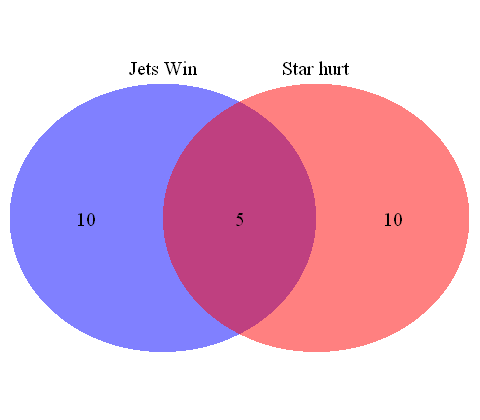

In [17]:
options(repr.plot.width=4, repr.plot.height=3.5)
draw.pairwise.venn(15, 15, 5, category = c("Jets Win", "Star hurt"), lty = rep("blank", 
2), fill = c("blue", "red"), alpha = rep(0.5, 2), cat.pos = c(0, 
 0), cat.dist = rep(0.025, 2), scaled = FALSE)

Clearly the probability of the Jets winning is greater when their star is $\textit{not}$ hurt, as the blue circle area (not includuing the purple overlap area) is much larger than the middle of the venn diagram where both the Jets win and the Star is hurt.

A = probability of Jets winning

B = probability star is hurt

In probability, this is expressed as:

$P(A|B) = \frac{P(A\cap B)}{P(B)}$

The probability of A (Jets win) Given (|) B (star is hurt) = the probability of A and B both occuring, divided by the probability of B occuring. We know intuitively that the probability of 2 things happening together is lower than 1 thing happening on it's own. This is Bayes' Rule, you are trying to determine how likely event 'A' is given that B already happened. 

$P(A\cap B) = P(B|A) P(A) $


This same formula can be written as:

$P(A|B) = \frac{P(B|A) P(A)}{P(B)}$

Let's try this hockey example out, we know the Jets have a high chance of winning at 60%, and the liklihood of getting hurt on the ice is 20%. The chances of them winning decrease by 20% if the star is hurt. If you heard the Jets won the Stanley Cup, what is the probability their star was hurt?


P(Win) = 0.60

P(Hurt) = 0.20

P(win|Hurt) = 0.40

P(Hurt|Win) = ?


$P(Hurt|Win) = \frac{P(Hhurt) P(Win|Hurt)}{P(Win)}$

$P(Hurt|Win) = \frac{0.2* 0.4}{0.6}$ = 0.133 = 13%

This is the basic concept of Bayes' Theorem. But what if you have probabilities of events occuring based on 1 set of data, and then later you collect more data and this value changes? Wouldn't it be great if we could update our probabilities with the new data?  This is possible with posterior sampling.

#### It turns out Bayes' Theorem is often expressed in terms of 'priors' and 'posteriors'.

Given a prior hypothesis $\textbf{H}$, and some posterior evidence $\textbf{E}$, the probabilty of the hypothesis prior to any evidence $\textbf{P(H)}$, and the posterior probability of the hypothesis after collecting evidence $\textbf{P(H|E)}$

$P(H|E) = \frac{P(E|H) P(H)}{P(E)}$ 
= $\frac{P(B|A) P(A)}{P(B|A)P(A) + P(B|A*)P(A*)}$

$P(H)$ = Prior Probability

$P(H|E)$ = Posterior probability

$\frac{P(E|H)} {P(E)}$ = Liklihood Ratio



Bayes' Theorem now becomes: the posterior probability equals the prior probability multiplied by the liklihood ratio.

This is particularily useful when you are training models to get better over time, or update values based on some conditions. For example, Amazon may suggest products to you given your previous purchases. As you make more purchases, the ability to predict what you may like increases.



If you're interested in these types of problems, numerical solutions can be pretty tough! 
##### Luckily, we can approximate the posterior distribution with a Marcov-chain Monte-Carlo (MCMC) simulation.

A Marcov-chain is a mathamatical system that represents the possible states of a system. For example, a person may have the states "sleeping", "eating", or "working". The Marcov chain will predict which state the person will move to nexted based soley on the current state. This is said to have no memory. The probability of transitioning from state to state is also recorded.

used to select the next location based on the current location, and has no memory of previous locations.
$P(next location) = 

A Monte Carlo simulation works by allowing a paramater to vary about a distribution (i.e., normal, logistic etc.) and creates many, many results based on these range of values. Thereby the simulation creates a range of results. If the distribution is normal, the results will tend to center around the mean

building models of possible results by substituting a range of values—a probability distribution—for any factor that has inherent uncertainty.

Posterior estimation is proporational to prior and liklihood. Sum up all prior*liklihoods then divide all individual prior*liklihood values by this sum to normalize them.

In [ ]:
posterior distribution is from same distribution as prior